In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

In [16]:
#podział na zbiór treningowy i testowy
#duży X - dane, mały y - target

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
print(X_train.shape)
print(X_test.shape)
print(type(iris))
print(iris.data.shape)

(112, 4)
(38, 4)
<class 'sklearn.utils.Bunch'>
(150, 4)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(3) #bierzemy 3 najbliższych sąsiadów
cls.fit(X_train, y_train) #klsyfikacja nadzorowana

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
#co przewidział model dla danych testowych
y_pred = cls.predict(X_test)
print(y_pred)

#porównywanie naszej klasyfikacji (y_pred) z rzeczywistością (y_test)
from sklearn.metrics import accuracy_score,classification_report 

print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred,y_test))

[0 1 0 0 0 2 0 2 2 0 2 1 2 1 1 2 2 0 0 0 2 0 2 1 2 0 0 1 2 2 0 1 0 1 2 0 0
 0]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      0.88      0.93         8
          2       0.93      1.00      0.96        13

avg / total       0.98      0.97      0.97        38

0.9736842105263158


In [32]:
##Rzut monetą - ćwiczenia poprzednie

In [119]:
total_rzuty = 30
liczba_orlow = 24
prawd_orla = 0.5

# 0 = reszka, 1 = orzeł
# wygeneruj jeden eksperyment
experiment = np.random.randint(0,2,total_rzuty)

print("eksperyment: {}".format(experiment))

#Policz liczbę orłów
ile_orlow = experiment[experiment==1].shape[0]
print(ile_orlow)

eksperyment: [1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1]
18


In [123]:
def rzut_moneta_eksperyment(ile_razy_powtorzyc):
    head_count = np.empty([ile_razy_powtorzyc,1],dtype=int)
    for times in np.arange(ile_razy_powtorzyc):
        experiment = np.random.randint(0,2, total_rzuty)
        head_count[times] = experiment[experiment==1].shape[0]
    return head_count

Wymiar:(100000, 1) 
 Typ: <class 'numpy.ndarray'>


C:\Users\rumcajs\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Otrzymaliśmy 68 orłów.
Co stanowiło 0.068 procent


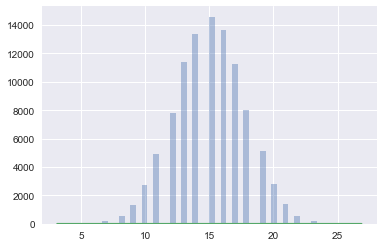

In [155]:
head_count = rzut_moneta_eksperyment(100000)
head_count[:10]
print('Wymiar:{} \n Typ: {}'.format(head_count.shape,type(head_count)))

%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

sns.distplot(head_count, kde=False)
sns.distplot(head_count, kde=True)

#print('Otrzymaliśmy {} orłów. Co stanowiło {} procent').format((head_count[head_count >= 24].shape[0]),(head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100))

print('Otrzymaliśmy {} orłów.'.format(head_count[head_count >= 24].shape[0]))
print('Co stanowiło {} procent'.format(head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100))

In [162]:
total_tosses = 30
def coin_toss_experiment(times_to_repeat):
    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

In [165]:
coin_toss_experiment(10000)

array([14, 12, 14, ..., 13, 11, 13])